In [3]:
import numpy as np
import pandas as pd

In [4]:
raw_data = pd.read_csv("train.csv")
raw_data

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,2185,361,1014.6,23.2,20.6,19.1,19.9,97.0,88.0,0.1,40.0,22.1,1
2186,2186,362,1012.4,17.2,17.3,16.3,15.3,91.0,88.0,0.0,50.0,35.3,1
2187,2187,363,1013.3,19.0,16.3,14.3,12.6,79.0,79.0,5.0,40.0,32.9,1
2188,2188,364,1022.3,16.4,15.2,13.8,14.7,92.0,93.0,0.1,40.0,18.0,1


In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2190 non-null   int64  
 1   day            2190 non-null   int64  
 2   pressure       2190 non-null   float64
 3   maxtemp        2190 non-null   float64
 4   temparature    2190 non-null   float64
 5   mintemp        2190 non-null   float64
 6   dewpoint       2190 non-null   float64
 7   humidity       2190 non-null   float64
 8   cloud          2190 non-null   float64
 9   sunshine       2190 non-null   float64
 10  winddirection  2190 non-null   float64
 11  windspeed      2190 non-null   float64
 12  rainfall       2190 non-null   int64  
dtypes: float64(10), int64(3)
memory usage: 222.5 KB


In [6]:
raw_data.describe()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
count,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000
mean,1094.500000,179.948402,1013.602146,26.365799,23.953059,22.170091,20.454566,82.036530,75.721918,3.744429,104.863151,21.804703,0.753425
std,632.342866,105.203592,5.655366,5.654330,5.222410,5.059120,5.288406,7.800654,18.026498,3.626327,80.002416,9.898659,0.431116
min,0.000000,1.000000,999.000000,10.400000,7.400000,4.000000,-0.300000,39.000000,2.000000,0.000000,10.000000,4.400000,0.000000
25%,547.250000,89.000000,1008.600000,21.300000,19.300000,17.700000,16.800000,77.000000,69.000000,0.400000,40.000000,14.125000,1.000000
50%,1094.500000,178.500000,1013.000000,27.800000,25.500000,23.850000,22.150000,82.000000,83.000000,2.400000,70.000000,20.500000,1.000000
75%,1641.750000,270.000000,1017.775000,31.200000,28.400000,26.400000,25.000000,88.000000,88.000000,6.800000,200.000000,27.900000,1.000000
max,2189.000000,365.000000,1034.600000,36.000000,31.500000,29.800000,26.700000,98.000000,100.000000,12.100000,300.000000,59.500000,1.000000


In [7]:
corr_mat = raw_data.corr(numeric_only=True)
corr_mat["rainfall"].sort_values()

sunshine        -0.555287
maxtemp         -0.079304
pressure        -0.049886
temparature     -0.049660
mintemp         -0.026841
winddirection   -0.006939
day             -0.000462
id               0.033674
dewpoint         0.081965
windspeed        0.111625
humidity         0.454213
cloud            0.641191
rainfall         1.000000
Name: rainfall, dtype: float64

In [8]:
raw_data["cloud"].describe()

count    2190.000000
mean       75.721918
std        18.026498
min         2.000000
25%        69.000000
50%        83.000000
75%        88.000000
max       100.000000
Name: cloud, dtype: float64

<Axes: >

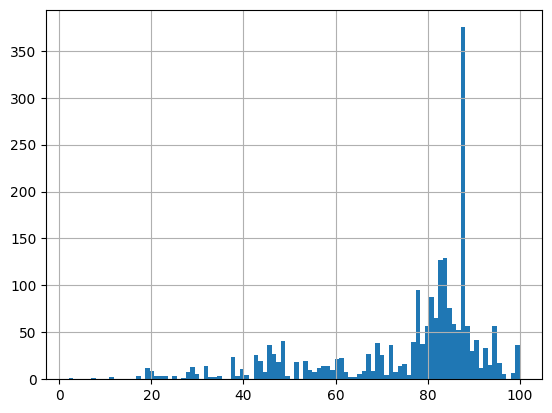

In [18]:
raw_data["cloud"].hist(bins=100)

In [20]:
raw_data["rainfall"].value_counts()

rainfall
1    1650
0     540
Name: count, dtype: int64

<Axes: >

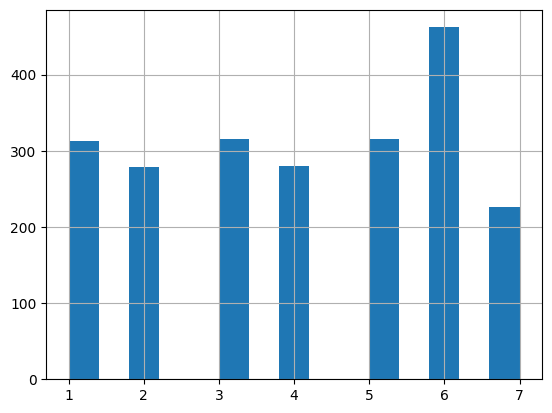

In [32]:
raw_data["cloud_category"] = pd.cut(raw_data["cloud"],
                                    bins=[0, 50, 70, 80, 83.5, 87.5, 90, np.inf],
                                    labels=[1, 2, 3, 4, 5, 6, 7]
                                    )
raw_data["cloud_category"].hist(bins=15)

In [ ]:
# from sklearn.model_selection import StratifiedShuffleSplit

# split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
# for train_index, test_index in split.split(raw_data, raw_data["cloud"]):
#     strat_trainset = raw_data.loc[train_index]
#     strat_testset = raw_data.loc[test_index]

# X_train = pd.DataFrame(strat_trainset, columns=list(raw_data))
# X_test = pd.DataFrame(strat_testset, columns=list(raw_data))

# y_train = X_train["rainfall"]
# y_test = X_test["rainfall"]

# X_train.drop(["rainfall"], inplace=True)
# X_test.drop(["rainfall"], inplace=True)